In [1]:
from Helper.Load.classification import Classification
from Helper.Visual.Train.classification import VClassification
from Helper.Visual.Load.classification import VClassification as loadVC
from Helper.Visual.Transform.classification import VClassification as transformVC
from Helper.Transform.Transform.classification import Classificaton_Transform
from Helper.Train.Train import Train

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd

In Visual-construct_figures
In Classification-construct_figures


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:935: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64 were al

In Visual-construct_figures
In Classification-construct_figures


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:935: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


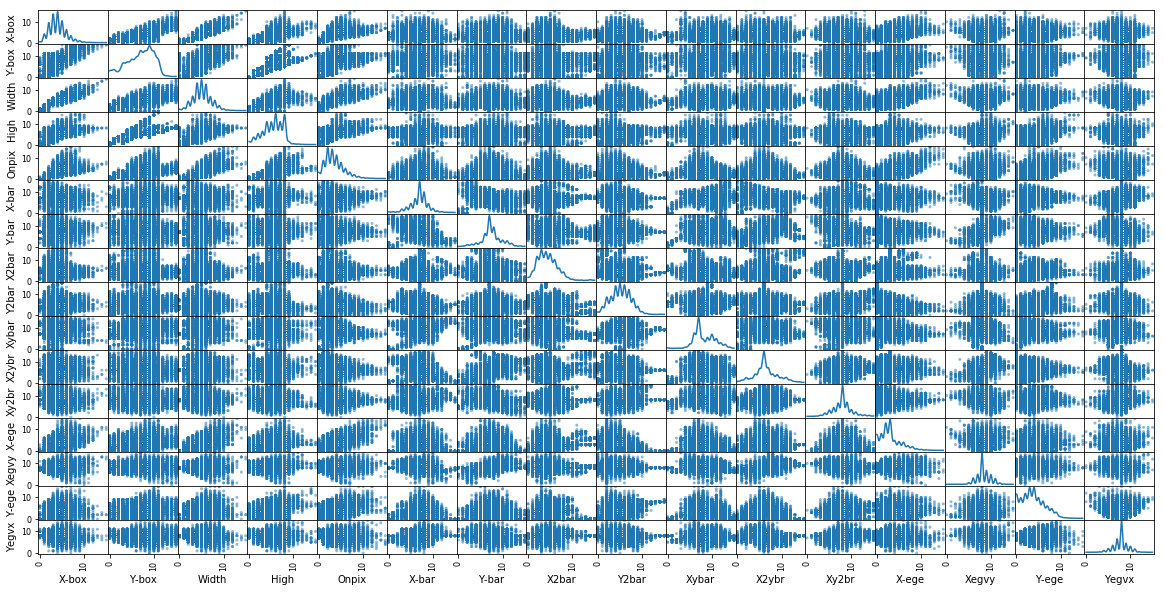

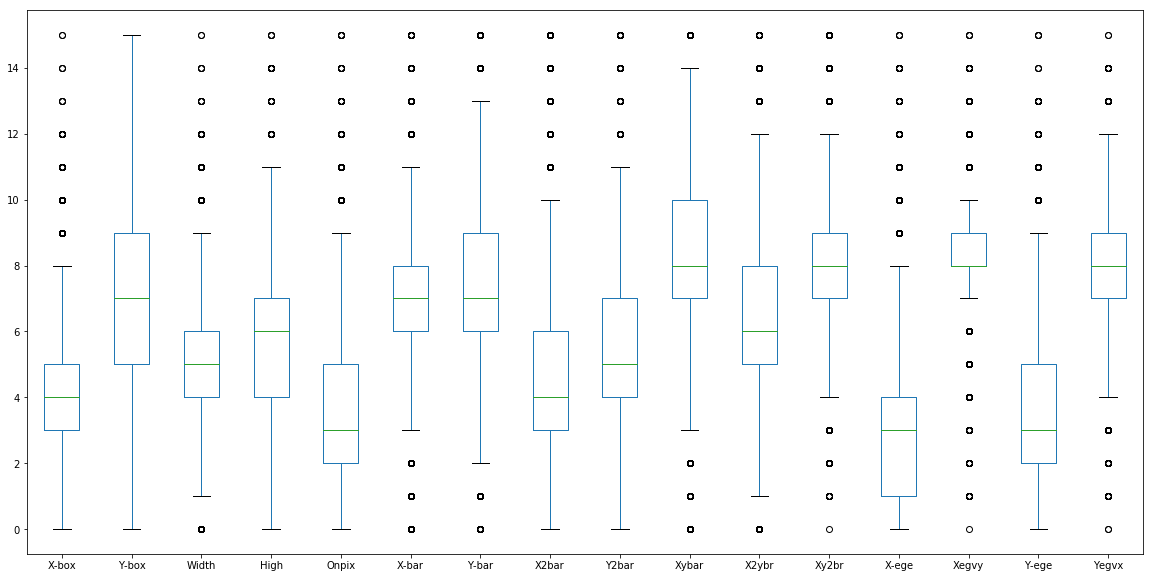

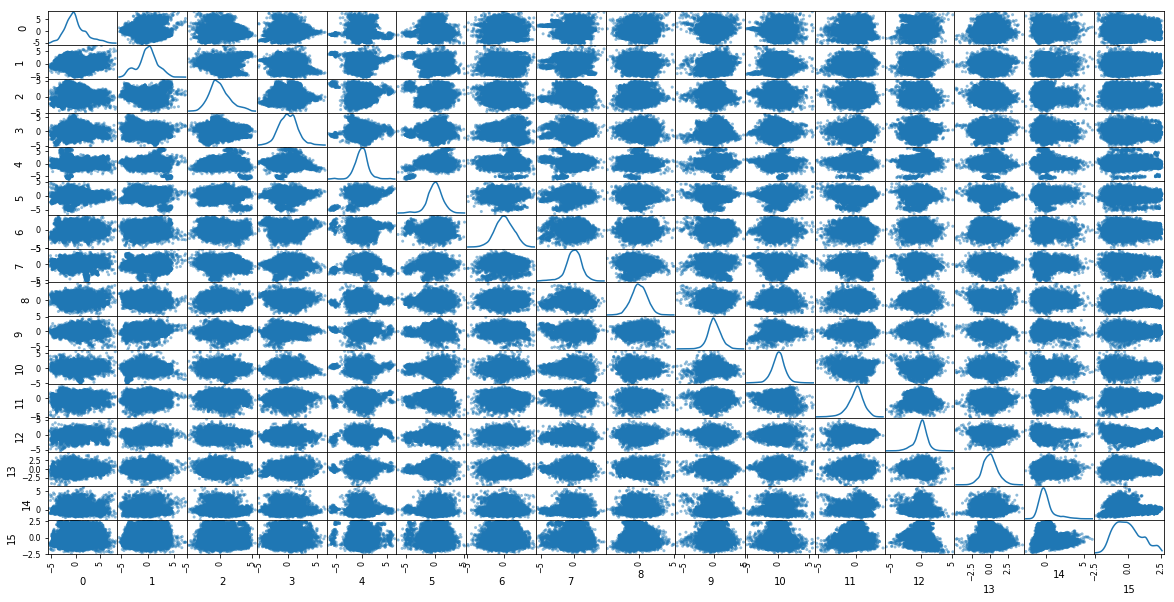

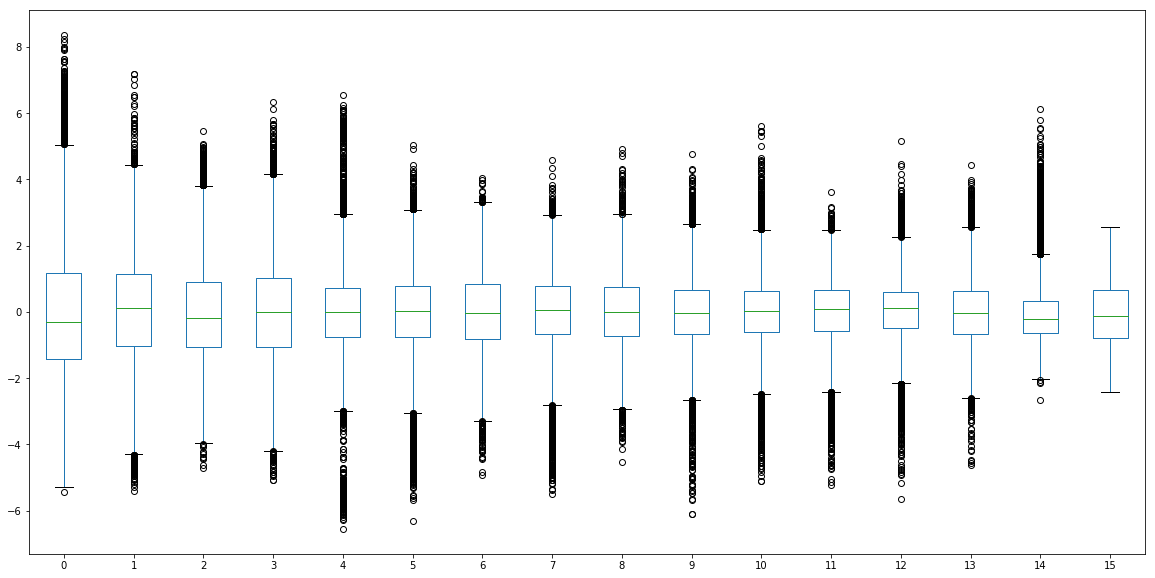

In [2]:
loadC = Classification("Data", "letter.dat", "letters-name.txt")
loadVC(loadC)

from Data.columns import Column_
transformC = Classificaton_Transform(loadC, Column_, LinearDiscriminantAnalysis)
transformVC(transformC)

from Data.hyperparameters import hyperparameters
trainC = Train(loadC, GaussianNB, transformC, hyperparameters)

In [3]:
trainC.pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'inputs', 'global', 'estimator', 'inputs__memory', 'inputs__steps', 'inputs__inputs', 'inputs__inputs__n_jobs', 'inputs__inputs__transformer_list', 'inputs__inputs__transformer_weights', 'inputs__inputs__inputs', 'inputs__inputs__inputs__memory', 'inputs__inputs__inputs__steps', 'inputs__inputs__inputs__ColumnSelector', 'inputs__inputs__inputs__StandardScaler', 'inputs__inputs__inputs__ColumnSelector__columns', 'inputs__inputs__inputs__StandardScaler__copy', 'inputs__inputs__inputs__StandardScaler__with_mean', 'inputs__inputs__inputs__StandardScaler__with_std', 'global__memory', 'global__steps', 'global__globals', 'global__globals__n_components', 'global__globals__priors', 'global__globals__shrinkage', 'global__globals__solver', 'global__globals__store_covariance', 'global__globals__tol', 'estimator__priors', 'estimator__var_smoothing'])

In [19]:
#clf = trainC.fit_GSCV()
clf

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('inputs', Pipeline(memory=None,
     steps=[('inputs', FeatureUnion(n_jobs=None,
       transformer_list=[('inputs', Pipeline(memory=None,
     steps=[('ColumnSelector', ColumnSelector(columns=['X-box', 'Y-box', 'Width', 'High', 'Onpix', 'X-bar', 'Y-bar', 'X2bar', 'Y2bar', 'Xybar', 'X2ybr', ...tore_covariance=False, tol=0.0001))])), ('estimator', GaussianNB(priors=None, var_smoothing=1e-09))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'global__globals__n_components': [1, 2, 3, 7, 10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
preds = clf.predict(loadC.partition.X_test)
np.mean(preds == loadC.partition.y_test.values.ravel())

/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.7169696969696969

(<matplotlib.image.AxesImage at 0x1a476d2438>,
 <matplotlib.colorbar.Colorbar at 0x1a2db1a7f0>)

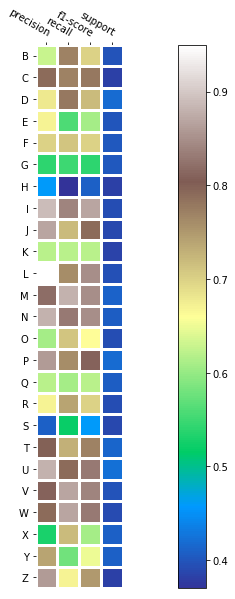

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
A = classification_report(loadC.partition.y_test.values, preds).split('\n')
B = np.array([row.split() for row in A[3:-5]])
A_ = A[0].split()
C, D = B[:,0], B[:,1:].astype(float)
D[:,-1] = 10*D[:,-1]*(1/sum(D[:,-1]))
D

from Helper.Visual.Train.construct_confusion_matrix import heatmap
heatmap(D, C, A_, cmap="terrain")

/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


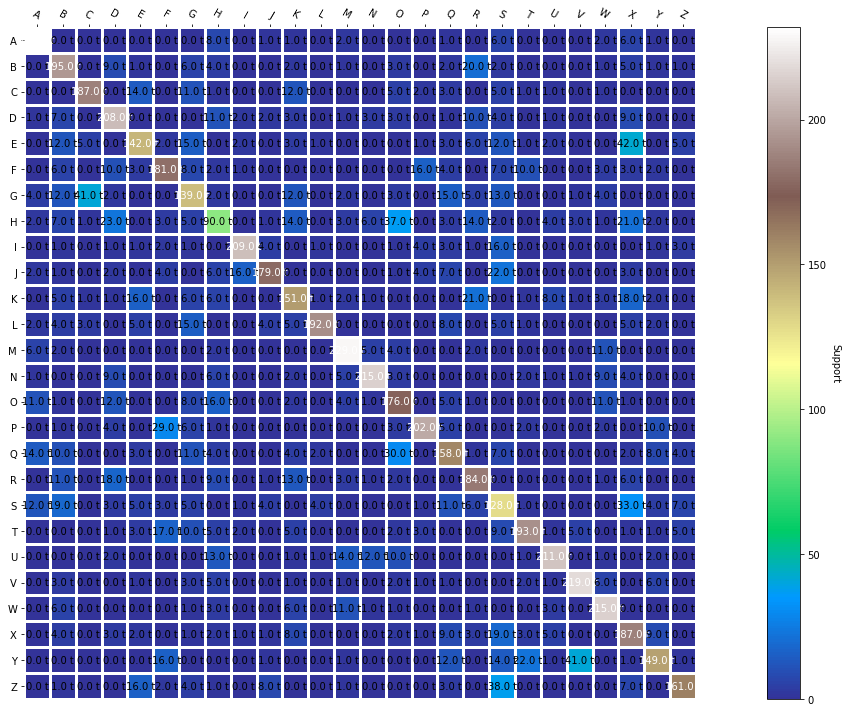

In [7]:
VClassification(trainC).construct_confuation_matrix()